# Algoritmos y Tipos de Errores en el Análisis Numérico

Autor: Pedro González Rodelas

Fecha de la primera versión: 10/08/2017

Fecha de la última revisión: 14/08/2017

Notebook adaptado y extendido a partir del notebook original de Mathematica incluido en el libro "Análisis Numérico con Mathematica" de Ariel Ciencia. ISBN: 84-344-8036-0. Dep. Legal: B.31.425-2001.

## Carga de los módulos y funciones empleadas

Antes de empezar a realizar cualquier cálculo numérico o simbólico debemos de cargar los correspondientes módulos de Python que implementan la mayoría de funciones y procedimientos necesarios para ello: NumPy y SymPy, que serán cargados con los pseudónimos np y sp, respectivamente. Además cargaremos la función del módulo random que nos permitirá generar números aleatorios, cada vez que los necesitemos.

In [1]:
import numpy as np # Importamos el módulo NumPy con el pseudónimo np
import sympy as sp # Importamos el módulo SymPy con el pseudónimo sp

In [2]:
from random import random 
# Importamos la función generadora de números pseudoaleatorios

Por otra parte, también usaremos de vez en cuando una función propia, que vamos a definir a continuación y posteriormente vectorizar, con el objeto de poder redondear por cero cualquier número o lista/array de números en coma flotante que sea menor que un cierto valor máximo, que también podremos indicar opcionalmente, aunque se suele tomar el valor $10^{-16}$ por defecto. 

In [3]:
def mychop(expr, *, max=10**(-16)): 
    if abs(expr) > max:
      return expr 
    else:
      return 0

In [4]:
chop_vec = np.vectorize(mychop)

In [5]:
mychop(10**(-16))

0

In [6]:
mychop(-10**(-6))

-1e-06

In [7]:
mychop(-0.2, max=0.25)

0

In [10]:
# mychop([0.2, 0.3, 0.1], max = 0.2) 
# Atención, ¡esta versión no está vectorizada!

In [8]:
 chop_vec([0.3, 0.5], max = 0.3)

array([0, 0])

In [9]:
chop_vec([[0.1,0.2],[10**(-6),0.4],[0.5,10**(-16)]])

array([[  1.00000000e-01,   2.00000000e-01],
       [  1.00000000e-06,   4.00000000e-01],
       [  5.00000000e-01,   0.00000000e+00]])

In [10]:
mychop(0.5,max = 0.25)

0.5

In [11]:
chop_vec([0.5,0.2], max = 0.25)

array([ 0.5,  0. ])

Una vez escrito (en algún pseudo lenguaje estandard) un algoritmo para resolver un problema es inmediato realizar el programa correspondiente en algún lenguaje de programación concreto. En este sentido Python es un lenguaje muy versátil, porque tiene muchas órdenes, y módulos específicos, que permiten resolver directamente un problema o parte del mismo y, además, permite estructurar el programa en pequeños módulos que podemos procesar por separado para verificar si funcionan correctamente y unirlos después, si se desea.

Vamos a calcular la suma de $n$ números. Para ello los introducimos en un vector $v$ y después sumamos las componentes de $v$ mediante el algoritmo descrito en el ejemplo $1$.

In [12]:
v = [1,-3.6,4.2,5]

In [13]:
v[0],v[-1]  # en Python el primer índice siempre es el 0, y éstos se 
# comportan como si el array estuviera cerrado de manera circular,
# de manera que el índice -1 correspondería al último elemento.

(1, 5)

In [14]:
n=len(v);  # para obtener la longitud total del array
n

4

In [15]:
s=0;         # variable que será usada como acumulador para la suma
for i in range(n):
    s = s + v[i]     # sumas parciales
    # print ( " + ", v[i]," = ",s)
s   # valor final de la suma

6.6

Podemos obtener el mismo resultado con la orden directa sum.

In [16]:
sum(v)  # orden equivalente para sumar los elementos de un array

6.6

Programamos a continuación el algoritmo que permite calcular el producto de las componentes no nulas de un vector $v$.

In [17]:
v = [1,0,1,2,-1,7] # un array o vector con elementos nulos

In [18]:
n = len(v)  # su longitud

In [19]:
p = 1;   # variable que se usará como acumulador para los productos
for i in range(n):
    if v[i]==0:  # identificación de los elementos nulos del vector
        print("componente ",i+1,"-ésima nula")
    else:
        p = p*v[i]   # productos parciales
print("producto de las componentes no nulas igual a ",p)        

componente  2 -ésima nula
producto de las componentes no nulas igual a  -14


# Comportamientos extraños debidos a los errores de redondeo

El ordenador puede trabajar con números que sean muy pequeños o muy grandes, pero, si trabaja con ambos simultáneamente, el número
pequeño puede perder su valor debido al redondeo. Por ejemplo, para un valor grande de $x$ es posible que $51.2+x$ lo tome como $x$. Para
simplificar, nos vamos a limitar a la sucesión de potencias de  $10$: $1$, $10$, $100$, $1000$, etc., es decir, de la forma $10^i$. Podemos buscar
el menor de ellos que cumple $51.2+x=x$ con el siguiente programa:

In [20]:
for i in range(20):
    print("para i =",i," resulta que 51.2+10^i = ", 51.2+10**i)

para i = 0  resulta que 51.2+10^i =  52.2
para i = 1  resulta que 51.2+10^i =  61.2
para i = 2  resulta que 51.2+10^i =  151.2
para i = 3  resulta que 51.2+10^i =  1051.2
para i = 4  resulta que 51.2+10^i =  10051.2
para i = 5  resulta que 51.2+10^i =  100051.2
para i = 6  resulta que 51.2+10^i =  1000051.2
para i = 7  resulta que 51.2+10^i =  10000051.2
para i = 8  resulta que 51.2+10^i =  100000051.2
para i = 9  resulta que 51.2+10^i =  1000000051.2
para i = 10  resulta que 51.2+10^i =  10000000051.2
para i = 11  resulta que 51.2+10^i =  100000000051.2
para i = 12  resulta que 51.2+10^i =  1000000000051.2
para i = 13  resulta que 51.2+10^i =  10000000000051.2
para i = 14  resulta que 51.2+10^i =  100000000000051.2
para i = 15  resulta que 51.2+10^i =  1000000000000051.2
para i = 16  resulta que 51.2+10^i =  1.0000000000000052e+16
para i = 17  resulta que 51.2+10^i =  1.0000000000000005e+17
para i = 18  resulta que 51.2+10^i =  1e+18
para i = 19  resulta que 51.2+10^i =  1e+19


Como bien puede comprobarse, se ha necesitado llegar a $10^{18}$ para que $51.2$ deje de influir para nada en la suma, aunque todo empieza a fallar, de alguna u otra manera, a partir de $10^{16}$. Esto es debido a que en los cálculos efectuados en coma flotante, los bits que habitualmente se dedican a almacenar la mantisa (52 bits) de un número decimal sólo pueden proporcionar una precisión que ronda los 16 dígitos significativos en base 10 (calcúlese el valor aproximado de $2^{-52}$). Por otro lado en lo que habitualmente se denomina "doble precisión" (64 bits en total) los otros 12 bits se suelen emplear de la siguiente manera: 11 bits para el exponente y el bit que resta para el signo.

In [21]:
s=0;
for i in range(11):
    # print("índice ", i)
    print("índice ", i, "2^i", 2**i)
    s = s + 2**i
print("máximo valor para el exponente", s)

índice  0 2^i 1
índice  1 2^i 2
índice  2 2^i 4
índice  3 2^i 8
índice  4 2^i 16
índice  5 2^i 32
índice  6 2^i 64
índice  7 2^i 128
índice  8 2^i 256
índice  9 2^i 512
índice  10 2^i 1024
máximo valor para el exponente 2047


In [118]:
# 323+308

Por otro lado, en el caso del exponente, en vez de usar otro de los bits para su signo, se prefiere realizar una traslación de este valor máximo $11111111111_2 = 2047_10$, restando su mitad entera, $2047//2 = 1023$. 

In [22]:
2047//2

1023

Así pues, en teoría cualquier número en coma flotante que no se encuentre en el rango de valores $10^{-1023}$ y $10^{+1024}$ daría lugar a los típicos errores de tipo "underflow" y "overflow", respectivamente. No obstante, como fácilmente podemos comprobar, Python usa una representación interna específica que hace que dichos errores de tipo "underflow" y "overflow" se den para otros valores concretos del exponente, que por supuesto nos conviene conocer para evitar los correspondientes errores en nuestros cálculos. Mientras que el error por "underflow" prácticamente se elimina, el error por "overflow" tiene lugar para un valor del exponente mucho más pequeño del esperado.

In [23]:
10**(-1023),10**1024

(0.0,
 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

No obstante, no hay que dejarse engañar, porque de momento todavía no se está trabajando en coma (o punto) flotante, sino que se están empleando números enteros, sólo que de manera simbólica, y por tanto admite muchos más decimales de los que en un principio podríamos creer.

In [24]:
10**(-10230),10**10240

(0.0,
 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Pero, ¿qué pasaría si alguno de los números tuviera decimales y el resultado se tuviera que dar en coma flotante?

In [25]:
10.**(-1024),10.**(-10240)

(0.0, 0.0)

Vemos por ejemplo que en el caso de potencias negativas no habría ningún problema, ya que Python 3 por defecto da $0.$ como resultado a partir de la potencia $-324$, como podemos comprobar fácilmente. De esta manera el error por "underflow" prácticamente se elimina, como puede comprobarse con los siguientes ejemplos:

In [26]:
10.**(-323),10.**(-324), 10**(-500000000000000000000000000000)

(1e-323, 0.0, 0.0)

En cuanto a las potencias positivas, ya es otra cuestión, como también se puede comprobar mediante los ejemplos adecuados.

In [27]:
10.**308

1e+308

In [28]:
10.**309

OverflowError: (34, 'Result too large')

In [29]:
323+308

631

Veámos otro típico ejemplo en el que un posible error de "overflow" es convertido en un valor infinito por la propia librería de funciones matemáticas implementadas en Python.

In [29]:
np.exp(-4*1000000*-0.0641515994108)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


inf

Si queremos saber con qué precisón opera realmente nuestro ordenador, vamos a encontrar el menor número $h$ de la
forma $h=10^{-i}$, con $i$ perteneciente a los naturales, tal que $1+h=1$. Supondremos a priori que $i$ es $100$ a lo sumo.

In [30]:
for i in range(100):
    if 1+10.**(-i) == 1:
        print("el primer valor para el que se da la igualdad 1+10^(-i)=1 es  i = ",i)
        break
print("Hemos terminado ")

el primer valor para el que se da la igualdad 1+10^(-i)=1 es  i =  16
Hemos terminado 


## Error por truncatura, cancelación y por redondeo

Si aproximamos ahora la derivada de una función en un cierto punto $x$ mediante la fórmula de derivación numérica $\frac{1}{h}(f(x+h)-f(x))$, cuando $h$ tome un valor similar al obtenido
anteriormente, la respuesta pues va a ser cero (de ahí que se denomine error de cancelación), pero antes habrán entrado en juego otros tipos de errores: el conocido error de redondeo (que tiene lugar en cualquier representación decimal finita), aparte del error de truncatura (inherente a la fórmula numérica empleada), y después el de cancelación (que unido a los demás tipos de errores es el que producirá resultados aún más extraños). Supongamos que el valor obtenido de $i$ anteriormente fue menor que $20$. Vamos a escribir aproximaciones de la derivada de $e^x$ en el punto
$x=1$. Las almacenamos en una lista, `aprox`, que posteriormente mostramos.

In [31]:
aprox = [];
for i in range(20):
    aprox.append((np.exp(1+10**(-i))-np.exp(1.))/(10**(-i)))
aprox

[4.6707742704716058,
 2.858841954873883,
 2.7319186557871245,
 2.7196414225332255,
 2.7184177470829241,
 2.7182954199567173,
 2.7182831874306146,
 2.7182819684057336,
 2.7182818218562943,
 2.7182820439008992,
 2.7182833761685288,
 2.7183144624132183,
 2.7187141427020833,
 2.7178259642823832,
 2.708944180085382,
 3.1086244689504379,
 0.0,
 0.0,
 0.0,
 0.0]

In [32]:
np.exp(1)

2.7182818284590451

Vemos claramente cómo las primeras aproximaciones distan sustancialmente del valor exacto debido a que el error de la fórmula empleada es importante cuando $h$ no es suficientemente pequeño, ya que procede de truncar el desarrollo de Taylor por el primer término y el error queda del mismo orden de $h$ (es el denominado error por truncatura). Cuando aumenta el valor de $i$ la aproximación de la derivada cada vez se acerca más al valor exacto, que con 16 decimales sería $2.7182818284590451$. Sin embargo, después de un cierto empeoramiento en el resultado (hay varios resultados que empiezan a alejarse del valor exacto debido a que se está produciendo un importante error de redondeo y empieza a actuar el denominado error por cancelación) al final acaba dando cero (que es el error por cancelación puro), como era de esperar, puesto que estaríamos restando dos números idénticos para el ordenador (que redondea $x+h$ y $x$ al mismo número máquina y será incapaz de distinguirlos).

Nuevamente comprobamos el error de cancelación al procesar el valor de la diferencia entre dos cantidades muy similares, concretamente entre
las raíces de $y+1$ e $y$ multiplicada por $y$, $\left(\sqrt{y+1}-\sqrt{y}\right)y$, para valores grandes de $y$, que equivale a
$\frac{y}{\sqrt{y+1}+\sqrt{y}}$ y que vale aproximadamente $\frac{\sqrt{y}}{2}$. Tomamos $y=2.5\ 10^i$. Almacenamos los valores obtenidos en una **lista** o **array**.

In [33]:
listapordif = []; listaporcoc = [];
for i in range(20):
    pordif = (np.sqrt(1+2.5*10**i)-np.sqrt(2.5*10**i))*2.5*10**i
    porcoc = 2.5*10**i/(np.sqrt(1+2.5*10**i)+np.sqrt(2.5*10**i))
    listapordif.append(pordif)
    listaporcoc.append(porcoc)
listapordif

[0.72422465825695226,
 2.4754878398196123,
 7.8978042282407124,
 24.997500499868153,
 79.0561509504073,
 249.99974999673213,
 790.56933600440971,
 2499.999982319423,
 7905.6944741751067,
 25000.008463393897,
 79056.917456910014,
 250001.90362334251,
 790460.03520488739,
 2491287.887096405,
 7916241.8842315674,
 18626451.49230957,
 0.0,
 0.0,
 0.0,
 0.0]

In [34]:
listaporcoc

[0.72422465825695259,
 2.4754878398196207,
 7.897804228240707,
 24.997500499875038,
 79.056150950605428,
 249.9997500005,
 790.56933598516912,
 2499.9999750000006,
 7905.6941425152545,
 24999.999997499999,
 79056.941503418915,
 249999.99999975,
 790569.41504201572,
 2499999.9999999749,
 7905694.1504209405,
 25000000.0,
 79056941.504209474,
 250000000.0,
 790569415.04209483,
 2500000000.0]

## Condicionamiento

Veamos ahora cómo se comporta la evaluación de diferentes funciones, por ejemplo suponemos dos funciones $f_1$ y $f_2$, que se van
a evaluar en $x=0.05$. Vamos a mostrar también los valores de $f_1$ y $f_2$ en otros dos puntos próximos a $0.05$, que distan
de éste una milésima. y en dos puntos más: uno fijo.

In [35]:
def f1(x):
    return sp.exp(200*x)+20

In [36]:
f1(0.049),f1(0.05),f1(0.051)

(18053.7449278285, 22046.4657948067, 26923.1860742975)

In [37]:
def f2(x):
    return sp.exp(-200*x)+20

In [38]:
f2(0.049),f2(0.05),f2(0.051)

(20.0000554515994, 20.0000453999298, 20.0000371703187)

En el primer caso las diferencias son enormes, mientras que en el segundo son insignificantes. Una variación de una milésima en el valor de $x$ implica una variación igual a $\frac{1}{1000}f_1^{'}(0.05)=4405.29$ en la primera función y $\frac{1}{1000}f_2^{'}(0.05)=-0.000009$.

In [39]:
x = sp.Symbol('x')

In [40]:
sp.diff(f1(x),x),sp.diff(f2(x),x)

(200*exp(200*x), -200*exp(-200*x))

In [41]:
def df1(x):
    return 200*sp.exp(200*x)

In [42]:
def df2(x):
    return -200*sp.exp(-200*x)

In [43]:
df1(0.05)/1000,df2(0.05)/1000

(4405.29315896134, -9.07998595249697e-6)

Por otra parte, hay matrices que están bien condicionadas, por ejemplo las de Householder. Estas matrices son de la forma $I-2 u u^\top$, donde $u$ es un vector con norma euclídea igual a la unidad. Sea por ejemplo $u=\left(\frac{4}{7},\frac{4}{7},\frac{4}{7},\frac{1}{7}\right)$, entonces la matriz de Householder correspondiente es

In [44]:
u = [4/7,4/7,4/7,1/7]

In [45]:
n = len(u);
n

4

In [46]:
np.identity(n)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [47]:
A = np.identity(n)-[[2*u[i]*u[j] for i in range(n)] for j in range(n)];
A

array([[ 0.34693878, -0.65306122, -0.65306122, -0.16326531],
       [-0.65306122,  0.34693878, -0.65306122, -0.16326531],
       [-0.65306122, -0.65306122,  0.34693878, -0.16326531],
       [-0.16326531, -0.16326531, -0.16326531,  0.95918367]])

Vemos que su inversa es ella misma

In [48]:
np.linalg.inv(A)

array([[ 0.34693878, -0.65306122, -0.65306122, -0.16326531],
       [-0.65306122,  0.34693878, -0.65306122, -0.16326531],
       [-0.65306122, -0.65306122,  0.34693878, -0.16326531],
       [-0.16326531, -0.16326531, -0.16326531,  0.95918367]])

In [49]:
np.dot(A,A)

array([[  1.00000000e+00,  -1.28369537e-16,  -1.28369537e-16,
         -2.77555756e-17],
       [ -1.28369537e-16,   1.00000000e+00,  -1.28369537e-16,
         -2.77555756e-17],
       [ -1.28369537e-16,  -1.28369537e-16,   1.00000000e+00,
         -2.77555756e-17],
       [ -2.77555756e-17,  -2.77555756e-17,  -2.77555756e-17,
          1.00000000e+00]])

In [50]:
chop_vec(_)

array([[  1.00000000e+00,  -1.28369537e-16,  -1.28369537e-16,
          0.00000000e+00],
       [ -1.28369537e-16,   1.00000000e+00,  -1.28369537e-16,
          0.00000000e+00],
       [ -1.28369537e-16,  -1.28369537e-16,   1.00000000e+00,
          0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

Si calculamos ahora la norma del máximo, vemos que $A$ tiene norma menor que $2$, por lo que su condicionamiento (con esta misma
norma del máximo) es menor que 4.

In [51]:
np.linalg.norm(A)

1.9999999999999998

Veamos cómo cambia la solución de un sistema cuando se perturba su matriz de coeficientes, $A$.
Por ejemplo, vamos a tomar como términos independientes (por comodidad) el vector $\left(-\frac{55}{49},-\frac{55}{49},-\frac{55}{49},\frac{23}{49}\right)$,
con lo cual la solución del sistema correspondiente es $(1,1,1,1)$.

In [52]:
b = [-55/49,-55/49,-55/49,23/49]

In [53]:
np.linalg.solve(A,b)

array([ 1.,  1.,  1.,  1.])

Perturbamos cada coeficiente de forma aleatoria, por ejemplo, con valores comprendidos entre $-0.05$ y $0.05$, para lo que definimos, y mostramos, una matriz cuyos elementos son dichas perturbaciones.

In [54]:
B = [[1/10*random()-0.05 for i in range(n)] for j in range(n)];
print(B)

[[0.034808828150944326, -0.0020672646014371215, -0.01229768112700573, -0.012548959153440543], [0.02376063882630429, -0.027305782703430006, -0.026660213366700283, -0.04714226464387135], [0.019706050709157083, -0.0046725599318108366, 0.049715990630344625, 0.009906979909847978], [-0.027054157789787016, 0.03817633254672584, 0.04380760167379032, 0.044421019766376454]]


In [55]:
np.linalg.solve(A+B,b)

array([ 1.01035041,  1.09419524,  0.94919245,  0.90866177])

Podríamos procesar varias veces y ver que las soluciones oscilan poco con respecto a la solución del sistema original. 

Pero si repetimos ahora lo mismo
con una nueva matriz A, que indicamos a continuación, los resultados sí que cambian significativamente:

In [56]:
A = [[93,-80,88,25],[-69,88,87,35],[7,7,6,6],[85,-84,83,20]]

Para tener de nuevo, por simplicidad, la solución $(1,1,1,1)$, tomamos como término independiente $b$ el vector $(126,141,26,104)$.

In [57]:
b = [126,141,26,104]

In [58]:
np.linalg.solve(A,b)

array([ 1.,  1.,  1.,  1.])

Veámos ahora cuál es la inversa de esta nueva matriz $A$, así como las correspondientes normas matriciales.

In [59]:
Ainv = np.linalg.inv(A)

In [60]:
np.linalg.norm(A), np.linalg.norm(Ainv)

(257.79255225859418, 1723.1407158312077)

Las matrices de Hilbert son otro ejemplo de matrices mal condicionadas. Definamos a continuación la de orden $4$, así como un vector de términos independientes adecuado para que la solución del correspondiente sistema siga siendo $(1,1,1,1)$.

In [61]:
A = np.array([[1/(i+j) for i in range(1,5)] for j in range(1,5)])
print(A)

[[ 0.5         0.33333333  0.25        0.2       ]
 [ 0.33333333  0.25        0.2         0.16666667]
 [ 0.25        0.2         0.16666667  0.14285714]
 [ 0.2         0.16666667  0.14285714  0.125     ]]


In [62]:
n = len(A)

In [63]:
np.size(A)

16

In [64]:
b = np.array([77/60, 19/20, 319/420, 533/840])

Como antes, perturbamos aleatoriamente la matriz $A$ y resolvemos el nuevo sistema, repitiendo varias veces el procedimiento para ver cómo afectan estas pequeñas perturbaciones a la solución final del mismo.

In [65]:
B = np.array([[1/10*random()-0.05 for i in range(n)] for j in range(n)])
np.linalg.solve(A+B,b)

array([-0.79120281,  2.15453017,  6.21627752, -3.39199843])

In [66]:
print(A+B)

[[ 0.5187826   0.33095843  0.28390475  0.2311602 ]
 [ 0.31331527  0.28549046  0.1716799   0.14281014]
 [ 0.25823639  0.22112564  0.13217594  0.09853278]
 [ 0.22992523  0.12266185  0.18103547  0.16898713]]


In [67]:
np.linalg.solve(A+B,b)

array([-0.79120281,  2.15453017,  6.21627752, -3.39199843])

# Precisión finita o infinita con Python

Evidentemente cualquiera de nosotros quisiera que los cálculos efectuados con el ordenador respondieran fidedignamente a los resultados que obtendríamos realizando dichos cálculos nosotros mismos con lápiz y papel, ya sean de tipo simbólico o con un determinado número de cifras decimales. Sin embargo, veámos qué pasa con alguna de las operaciones que vienen a continuación cuando las realizamos en una computadora usando un lenguaje de programación cualquiera, como Python en este caso:

In [68]:
1.1+2.2

3.3000000000000003

In [69]:
0.7+0.1

0.7999999999999999

In [70]:
0.1+0.2

0.30000000000000004

In [71]:
1/10+1/5

0.30000000000000004

Todos estos resultados escapan a toda lógica, si suponemos que estamos operando con al menos un decimal en base 10; pero la cuestión es que cualquier sistema digital (ya sea una simple calculadora, un ordenador portátil o super ordenador de cálculo científico) opera internamente en sistema binario (sólo ceros y unos); con lo cuál cualquier número (ya sea entero, fraccionario, decimal en coma flotante, etc.) debe de convertirse previamente a un número en base 2 y almacenarse de alguna manera en forma de una colección de bits en uno o varios registros electrónicos, que constituyen parte de la memoria RAM o de tipo Cache a distintos niveles dentro de la máquina, antes de poder realizarse cualquier operación con él.

Afortunadamente, hoy en día los diferentes sistemas de computación simbólica (CAS de las siglas en inglés) poseen herramientas que hacen posible la computación con diferentes grados de precisión, hasta llegar incluso a la llamada precisión infinita, cuando se permite el cálculo de tipo simbólico. En el caso de Python, esta computación simbólica viene de la mano del módulo SymPy, que ya habíamos cargado al principio de este notebook con el alias sp.

Por otra parte, SymPy posee tipos de datos numéricos propios: Rational, Integer, etc. pero ya que las nuevas versiones de Python admiten la posibilidad de trabajar por defecto con enteros "largos", como veremos en algunos ejemplos a continuación, nos centraremos fundamentalmente en cómo trabajar con fracciones.

Pero con el objeto de obtener unas bonitas salidas de resultados en formato $\LaTeX$ ejecutemos también la siguiente orden.

In [72]:
sp.init_printing()

In [73]:
n1 = sp.Integer(12345678901234567890123456789012345678909)
n2 = sp.Integer(99999999999999999999999999999999999999999)

In [74]:
n1+n2

In [75]:
12345678901234567890123456789012345678909+99999999999999999999999999999999999999999

In [76]:
r1 = sp.Rational(4,5)
r2 = sp.Rational(5,3)

In [77]:
r = r1+r2

In [78]:
r

Para poder evaluar ahora numéricamente dicha fracción y obtener las cifras significativas (ya sean enteras o decimales) que nececesitemos, podemos usar varias funciones específicas para ello.

In [79]:
sp.N(r), sp.N(r,6),  sp.N(r,26) 

In [80]:
r.evalf(),r.evalf(n=6), r.evalf(n=26)

Vemos que por defecto, si no indicamos un número de cifras concreto,
se suelen presentar los resultados con unas 15 cifras significativas, aunque internamente se suela trabajar con unas 16 cifras por defecto.

Por otro lado, vemos también que cuando los números que se usan como datos son todos enteros, racionales o reales pero de tipo simbólico y no se indica que se utilice una aproximación numérica de los mismos, entonces *Python* opera en modo simbólico y, por tanto, con precisión infinita. Sin embargo, también podemos indicar que alguno o algunos de ellos sean considerados en coma (o punto) flotante y todas las operaciones en las que intervenga las hará también en ese formato. Observe los siguientes ejemplos, y fíjese en el hecho de poder cambiar el tipo de muchas constantes un números reales sin más que cambiar el módulo del que provienen (sp. por np.):

In [81]:
12345678901234567890123456789012345678909 + 9

In [82]:
12345678901234567890123456789012345678909 + 9.

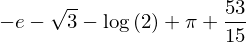

In [83]:
sp.Rational(1,3)+sp.Rational(32,10)-sp.log(2)-sp.sqrt(3)+sp.pi-sp.E

In [84]:
sp.Rational(1,3)+3.2-sp.log(2)-sp.sqrt(3)+sp.pi-sp.E

In [85]:
sp.Rational(1,3)-sp.log(2)-np.sqrt(3)+sp.pi-sp.E + 3.2

In [86]:
sp.Rational(2,5)-np.log(2)-np.sqrt(3)+np.pi-sp.E + 3.2

In [87]:
sp.Rational(1,3)-np.log(2)-np.sqrt(3)+np.pi-np.e + 3.2
# nótese el detalle del número e en mayúscula o minúscula, 
# según provenga del módulo SymPy o NumPy, respectivamente. 

Pero también podríamos preguntarnos ahora, ¿con qué precisión ha considerado el valor $\frac{1}{3}$ o $\frac{32}{10}$ en cualquiera de estos cálculos? ¿Podríamos pedir el resultado anterior con más cifras decimales? Veámos qué ocurre cuando le pedimos 10, 20 o 50 cifras, por ejemplo:

In [88]:
r = sp.Rational(1,3);
r.evalf(n=3),r.evalf(n=30), r.evalf(50)

In [89]:
r = 3.2;
# r.evalf(n=3)
# Esta función no está implementada para números en coma flotante

In [90]:
r = 3.2;
sp.N(r,10),sp.N(r,16),sp.N(r,17),sp.N(r,20),sp.N(r,50)
# Sin embargo es posible emplear la evaluación mediante sp.N
# aunque con resultados nada coherentes si se piden más cifras
# de las que realmente disponemos almacenadas internamente.

Ello se debe a que cuando se introduce en un sistema digital un número con punto decimal, por ejemplo $0.7$ o $3.2$, *Python* lo considera internamente con un máximo de 16 cifras significativas; ya que en todo caso lo tiene que redondear al número máquina más próximo a él, aunque unas veces el redondeo será por defecto y otras por exceso. Pero lo mismo ocurrirá si le solicitamos más cifras y forzamos a que dicho número máquina sea completado para mostrarnos más cifras de las almacenadas. Veámoslo:

In [91]:
sp.N(0.7,16),sp.N(0.7,17)

In [92]:
sp.N(sp.Rational(7/10),17),sp.Rational(7/10).evalf(17)

In [93]:
sp.N(sp.Rational(7/10),20),sp.Rational(7/10).evalf(20)

In [94]:
sp.N(3.2,16),sp.N(3.2,17)

Otros ejemplos son los siguientes:

In [95]:
sp.N(123456.12,20)

In [96]:
sp.N(1234.5678901234567890),sp.N(1234.5678901234567890,20)

In [97]:
sp.N(1234.56789012345678901234567890123456,50)

Así pues, hay que cuidar bien la entrada de datos. Observemos por ejemplo el resultado de la siguiente operación, cuyo valor exacto es realmente cero: 

In [98]:
3.1*10**50-31*10**49
# Obtenemos pues un resultado completamente erróneo

Vemos pues, que si lo que queremos o necesitamos es trabajar en todo momento con una determinada precisión, diferente a la estandar (de 16 cifras significativas) para cálculos en coma flotante, tendríamos que trabajar en todo momento en simbólico (si queremos una precisión mayor a la estandar) o bien en coma flotante (para cualquier precisión inferior a la estandar) y luego forzar a que los resultados finales se muestren con la precisión deseada.  

Otras alternativas pasarían por emplear o programar nosotros mismos otros módulos específicos que nos permitan trabajar y obtener resultados con precisión deseada. Uno de estos módulos es **decimal** del que mostramos a continuación algunas de sus posibilidades y forma de uso.

In [99]:
from decimal import *
getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [100]:
mporig = getcontext().prec # Nótese que laa precisión por defecto 
# que tiene este módulo viene prefijada con el valor prec = 28.

In [101]:
Decimal(np.e),Decimal(np.pi),Decimal(np.sqrt(2)),Decimal(np.log(2))

(Decimal('2.718281828459045090795598298427648842334747314453125'),
 Decimal('3.141592653589793115997963468544185161590576171875'),
 Decimal('1.4142135623730951454746218587388284504413604736328125'),
 Decimal('0.69314718055994528622676398299518041312694549560546875'))

In [102]:
getcontext().prec = 6

In [103]:
Decimal(3).sqrt(),Decimal(np.sqrt(3))
# Nótese la diferencia en el número de cifras

(Decimal('1.73205'),
 Decimal('1.732050807568877193176604123436845839023590087890625'))

In [104]:
Decimal(2).ln(), Decimal(np.log(2))
# Nótese la diferencia en el número de cifras

(Decimal('0.693147'),
 Decimal('0.69314718055994528622676398299518041312694549560546875'))

In [105]:
Decimal(np.e),Decimal(np.pi)

(Decimal('2.718281828459045090795598298427648842334747314453125'),
 Decimal('3.141592653589793115997963468544185161590576171875'))

In [106]:
Decimal(1) / Decimal(3)

Decimal('0.333333')

In [107]:
frac = Decimal(1)/Decimal(3) + Decimal(3)/Decimal(2)
frac

Decimal('1.83333')

In [108]:
sp.N(frac),sp.N(frac,3),sp.N(frac,10)  # Fíjese qué ocurre si le 
# pedimos más decimales de los que tenemos almacenados en este caso

In [109]:
frac-Decimal(np.log(2))-Decimal(np.sqrt(3))+Decimal(np.pi)-Decimal(np.e)
# Nótese la manera en la que podríamos controlar el número de dígitos

Decimal('-0.168562')

In [110]:
getcontext().prec = mporig
Decimal(1) / Decimal(3)

Decimal('0.3333333333333333333333333333')

In [111]:
Decimal(np.e),Decimal(np.pi)

(Decimal('2.718281828459045090795598298427648842334747314453125'),
 Decimal('3.141592653589793115997963468544185161590576171875'))

In [112]:
frac = Decimal(1)/Decimal(3) + Decimal(3)/Decimal(2)
frac

Decimal('1.833333333333333333333333333')

In [113]:
frac-Decimal(np.log(2))-Decimal(np.sqrt(3))+Decimal(np.pi)-Decimal(np.e)

Decimal('-0.1685538296647411208676696034')

In [114]:
Decimal(2).ln(), Decimal(np.log(2))
# Nótese la diferencia en el número de cifras

(Decimal('0.6931471805599453094172321215'),
 Decimal('0.69314718055994528622676398299518041312694549560546875'))

In [115]:
Decimal(3).sqrt(),Decimal(np.sqrt(3))
# Nótese la diferencia en el número de cifras

(Decimal('1.732050807568877293527446342'),
 Decimal('1.732050807568877193176604123436845839023590087890625'))

In [116]:
frac-Decimal(2).ln()-Decimal(3).sqrt()+Decimal(np.pi)-Decimal(np.e)

Decimal('-0.1685538296647412444089799594')

## Estabilidad

Vamos a generar ahora $20$ términos de la sucesión $\frac{1}{2^n}$ por dos procedimientos diferentes. Uno estable y otro inestable cuando operamos con pocas cifras ($6$ en principio), aunque inicialmente no cometamos error alguno.

In [117]:
getcontext().prec = 6

In [118]:
x = Decimal(1)/Decimal(2); lista = [x];
for i in range(20):
    x = x/Decimal(2)
    lista.append(x)
lista

[Decimal('0.5'),
 Decimal('0.25'),
 Decimal('0.125'),
 Decimal('0.0625'),
 Decimal('0.03125'),
 Decimal('0.015625'),
 Decimal('0.0078125'),
 Decimal('0.00390625'),
 Decimal('0.00195312'),
 Decimal('0.00097656'),
 Decimal('0.00048828'),
 Decimal('0.00024414'),
 Decimal('0.00012207'),
 Decimal('0.000061035'),
 Decimal('0.0000305175'),
 Decimal('0.0000152588'),
 Decimal('0.0000076294'),
 Decimal('0.0000038147'),
 Decimal('0.00000190735'),
 Decimal('9.53675E-7'),
 Decimal('4.76838E-7')]

In [119]:
x = Decimal(1)/Decimal(2); y =Decimal(1)/Decimal(4); lista = [x,y];
for i in range(19):
    z = Decimal(23)/Decimal(2)*y-Decimal(11)/Decimal(2)*x
    lista.append(z)
    x = y; y = z
lista

[Decimal('0.5'),
 Decimal('0.25'),
 Decimal('0.125'),
 Decimal('0.0625'),
 Decimal('0.03125'),
 Decimal('0.015625'),
 Decimal('0.007813'),
 Decimal('0.0039120'),
 Decimal('0.0020165'),
 Decimal('0.0016738'),
 Decimal('0.0081579'),
 Decimal('0.0846099'),
 Decimal('0.928146'),
 Decimal('10.2083'),
 Decimal('112.290'),
 Decimal('1235.19'),
 Decimal('13587.1'),
 Decimal('149458'),
 Decimal('1.64404E+6'),
 Decimal('1.80845E+7'),
 Decimal('1.98930E+8')]

Vemos pues claramente como en este segundo procedimiento, debido a la precisión limitada de nuestros cálculos, los pequeños errores que se van cometiendo desde los primeros términos se van agrandando cada vez más, a medida que se va generando la correspondiente sucesión, llegando a dar resultados completamente desorbitados y fuera de lugar para una sucesión que debería de tender a cero.

# Ejercicios

1.- Programe el paso de la numeración decimal a la binaria y aplíquelo para obtener la representación en binario de los números
del sistema decimal 5500 y 0.1.

2.- Obtenga aproximaciones de la derivada de la función seno en el punto $0.25$, a partir de la fórmula $\frac{1}{h}sen(0.25+h)-sen(h))$,
con $h$ de la forma $10^{-i}$, con $i=1,2,3,\ldots\text{...}$, deteniéndose cuando la diferencia entre dos aproximaciones consecutivas aumente.

3.- Programe la sucesión de término general $\frac{1}{3^n}$, a partir de las siguientes leyes de recurrencia:

$\quad $a) $a_0=1$; $a_n=\frac{1}{3}a_{n-1}, n\geq 1$.

$\quad $b) $a_0=1$; $a_1=\frac{1}{3}$; $a_n=\frac{4}{3}a_{n-1}-\frac{1}{3}a_{n-2}, n\geq 2$.

$\quad $c) $a_0=1$, $a_1=\frac{1}{3}$, $a_n=\frac{10}{3}a_{n-1}-a_{n-2}$.

Comprobará la mala propagación de los errores en algunos casos.